<a href="https://colab.research.google.com/github/ghkdwnwsdud/AI-Project/blob/main/AIP_week6_Tensorboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
####################### 인공지능 프로그래밍 ########################
#################### Week6 - Tensorboard ######################
###############################################################

# Due Date 2024.04.14 23:59
# TA - Sim Wooseok, dntjr41@g.skku.edu

# Course Materials Source
# https://www.tensorflow.org/tensorboard/get_started?hl=ko

### Introduction and overview

- Tracking and Visualizing metrics such as loss and accuracy
- Visualizing the model graph (ops and layers)
- Viewing histograms of weights, biases, or other tensors as they change over time
- Projecting embeddings to a lower dimensional space
- Displaying images, text and audio data
- Profiling TensorFlow programs
- And much more


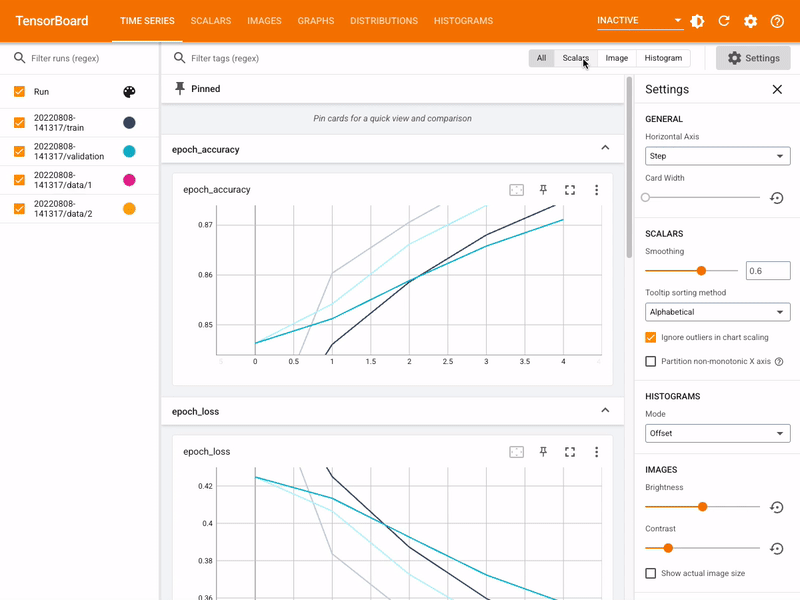

### Start Tensorboard with Pytorch


[Tensorboard in Pytorch using the **SummaryWriter(Object)**]
- The **scalar tab** for showing how the training process happened over time by means of displaying scalars. (e.g., in a line plot [Epoch_Accuracy, Epoch_Loss]).


- The **images tab** for showing images written away during the training process. (e.g., training dataset)

- The **graphs tab** showing the network graph created by (in the original case) TensorFlow during training.

- The **distributions tab** showing the distributions of the weights and biases of your network for every iteration.

- The **histograms tab** showing the weight and bias histograms helping you determine how the model learned what it learned.

- The **embeddings tab** visualizes learned embeddings.

It's possible to write from PyTorch to each of these tabs \\
(This package is **optimized for TensorFlow**, so some functionalities may be restricted when using it with **PyTorch**.):

- Using *add_scalar* (or *add_scalars*), you can write scalar data to the scalar tab.

- By means of *add_image* (or *add_images*), images can be written to the images tab. Besides, it is also possible to write Matplotlib figures using *add_figure*. And if you have videos (for example by having an array with multiple images), *add_video* can be used.

- Through *add_graph*, graph data can be written to TensorBoard's graphs tab.

- With *add_histogram*, you can write histogram data to the histogram tab.

- Via *add_embedding*, embedding data can be written to the embeddings tab.

- You can also use *add_audio* for audio data and *add_text* for text data. *add_mesh* can be used for 3D point cloud data.

[Adding Tensorboard to your Pytorch model]

1. Initializing the **SummaryWriter** which allows us to write to Tensorboard.

2. Starting with a simple Convoultional Neural Network

3. Writing away some scalar values, both individually and in groups

4. Writing away iamges, graphs and histograms.

5. **Close the SummaryWriter**


### Package Install & Log Setting

In [ ]:
# Package Install
import os
import torch
from torch import nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms
import datetime

# SummaryWriter Package Install (Pytorch)
from torch.utils.tensorboard import SummaryWriter

In [ ]:
# Clear any logs from previous runs
!mkdir ./logs/
log_folder = 'logs'

# Load the TensorBoard notebook extension
%load_ext tensorboard

### A Simple ConvNet to start with

In [ ]:
class ConvNet(nn.Module):
  '''
    Simple Convolutional Neural Network
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Conv2d(1, 10, kernel_size=3),
      nn.ReLU(),
      nn.Conv2d(10, 5, kernel_size=3),
      nn.ReLU(),
      nn.Flatten(),
      nn.Linear(24 * 24 * 5, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 10)
    )


  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

In [ ]:
if __name__ == '__main__':

  # Set fixed random number seed
  torch.manual_seed(42)

  # Prepare MNIST dataset
  dataset = MNIST(os.getcwd(), download=True, transform=transforms.ToTensor())
  trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)

  # Initialize the ConvNet
  convnet = ConvNet()

    # Define the loss function and optimizer
  loss_function = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(convnet.parameters(), lr=1e-4)

  # Run the training loop
  for epoch in range(0, 3): # 5 epochs at maximum

    # Print epoch
    print(f'Starting epoch {epoch+1}')

    # Set current loss value
    current_loss = 0.0

    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):

      # Get inputs
      inputs, targets = data

      # Zero the gradients
      optimizer.zero_grad()

      # Perform forward pass
      outputs = convnet(inputs)

      # Compute loss
      loss = loss_function(outputs, targets)

      # Perform backward pass
      loss.backward()

      # Perform optimization
      optimizer.step()

      # Print statistics
      current_loss += loss.item()

      if i % 500 == 499:
          print('Loss after mini-batch %5d: %.3f' %
                (i + 1, current_loss / 500))
          current_loss = 0.0

  # Process is complete.
  print('Training process has finished.')

### Scalar

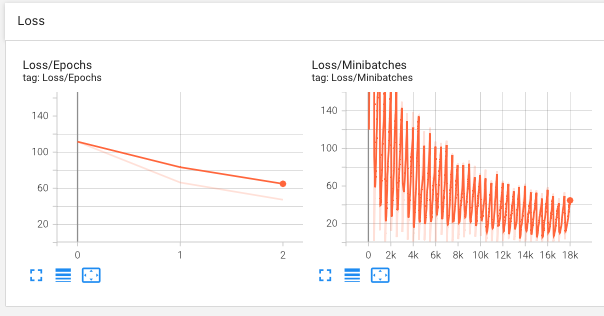

In [ ]:
# Initialize the SummaryWriter for TensorBoard
# Its output will be written to ./runs/ (Default Setting)
writer = SummaryWriter()

# 1. Set index of the Loss value to be saved
loss_idx_value = 0

# 2. Save Loss (Minibatch)
writer.add_scalar("Loss/Minibatch", current_loss, loss_idx_value)
loss_idx_value += 1

# 3. Save Loss (Epoch)
writer.add_scalar("Loss/Epochs", current_loss, epoch)

# Close the SummaryWriter
writer.close()

In [ ]:
# Log Directory Setting
log_dir = "logs/scalar"

In [ ]:
if __name__ == '__main__':

  # Initialize the SummaryWriter for TensorBoard
  # Its output will be written to log_dir = './logs/scalar/'
  writer = SummaryWriter(log_dir=log_dir)

  # Set fixed random number seed
  torch.manual_seed(42)

  # Prepare MNIST dataset
  dataset = MNIST(os.getcwd(), download=True, transform=transforms.ToTensor())
  trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)

  # Initialize the ConvNet
  convnet = ConvNet()

  # Define the loss function and optimizer
  loss_function = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(convnet.parameters(), lr=1e-4)

  ### Scalar
  # 1. Run the training loop
  loss_idx_value = 0

  for epoch in range(0, 3): # 5 epochs at maximum

    # Print epoch
    print(f'Starting epoch {epoch+1}')

    # Set current loss value
    current_loss = 0.0

    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):

      # Get inputs
      inputs, targets = data

      # Zero the gradients
      optimizer.zero_grad()

      # Perform forward pass
      outputs = convnet(inputs)

      # Compute loss
      loss = loss_function(outputs, targets)

      # Perform backward pass
      loss.backward()

      # Perform optimization
      optimizer.step()

      # Print statistics
      current_loss += loss.item()

      ### Scalar
      # 2. Save Loss (Minibatches)
      writer.add_scalar("Loss/Minibatches", current_loss, loss_idx_value)
      loss_idx_value += 1

      if i % 500 == 499:
          print('Loss after mini-batch %5d: %.3f' %
                (i + 1, current_loss / 500))

          ### Scalar
          # 3. Save Loss (Epoch)
          writer.add_scalar("Loss/Epochs", current_loss, epoch)

          current_loss = 0.0

  # Process is complete.
  print('Training process has finished.')

  # Close the SummaryWriter
  writer.close()

In [ ]:
%tensorboard --logdir logs/scalar

### Graphs

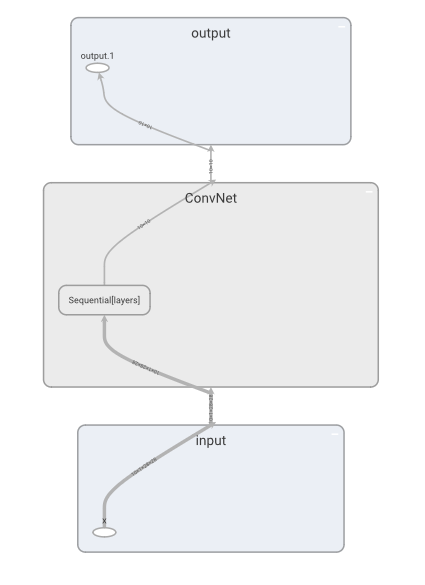

In [ ]:
# Initialize the SummaryWriter for TensorBoard
# Its output will be written to './runs/' (Default Setting)
writer = SummaryWriter()

# Write the network graph at epoch 0, batch 0
if epoch == 0 and i == 0:
  writer.add_graph(convnet, input_to_model=data[0], verbose=False)

# Close the SummaryWriter
writer.close()

In [ ]:
# Log Directory Setting
log_dir = "logs/graph"

In [ ]:
if __name__ == '__main__':

  # Initialize the SummaryWriter for TensorBoard
  # Its output will be written to log_dir = './logs/graph/'
  writer = SummaryWriter(log_dir=log_dir)

  # Set fixed random number seed
  torch.manual_seed(42)

  # Prepare MNIST dataset
  dataset = MNIST(os.getcwd(), download=True, transform=transforms.ToTensor())
  trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)

  # Initialize the ConvNet
  convnet = ConvNet()

  # Define the loss function and optimizer
  loss_function = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(convnet.parameters(), lr=1e-4)

  for epoch in range(0, 1): # 5 epochs at maximum

    # Print epoch
    print(f'Starting epoch {epoch+1}')

    # Set current loss value
    current_loss = 0.0

    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):

      if i > 1000:
        break

      # Get inputs
      inputs, targets = data

      ### Graph
      # Write the network graph at epoch 0, batch 0
      if epoch == 0 and i == 0:
        writer.add_graph(convnet, input_to_model=data[0], verbose=False)

      # Zero the gradients
      optimizer.zero_grad()

      # Perform forward pass
      outputs = convnet(inputs)

      # Compute loss
      loss = loss_function(outputs, targets)

      # Perform backward pass
      loss.backward()

      # Perform optimization
      optimizer.step()

      # Print statistics
      current_loss += loss.item()

      if i % 500 == 499:
          print('Loss after mini-batch %5d: %.3f' %
                (i + 1, current_loss / 500))
          current_loss = 0.0

  # Process is complete.
  print('Training process has finished.')

  # Close the SummaryWriter
  writer.close()

In [ ]:
%tensorboard --logdir logs/graph --port 6007

### Images

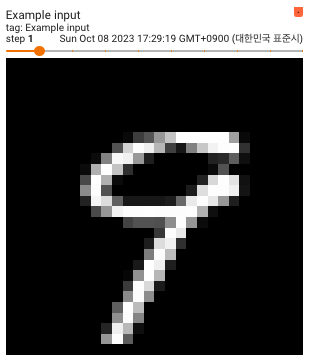

In [ ]:
# Initialize the SummaryWriter for TensorBoard
# Its output will be written to './runs/' (Default Setting)
writer = SummaryWriter()

# Write an image at every batch 0
if i == 0:
  writer.add_image("Example input", inputs[0], global_step=epoch)

# Close the SummaryWriter
writer.close()

In [ ]:
# Log Directory Setting
log_dir = "logs/image"

In [ ]:
if __name__ == '__main__':

  # Initialize the SummaryWriter for TensorBoard
  # Its output will be written to log_dir = './logs/image'
  writer = SummaryWriter(log_dir=log_dir)

  # Set fixed random number seed
  torch.manual_seed(42)

  # Prepare CIFAR-10 dataset
  dataset = MNIST(os.getcwd(), download=True, transform=transforms.ToTensor())
  trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)

  # Initialize the ConvNet
  convnet = ConvNet()

  # Define the loss function and optimizer
  loss_function = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(convnet.parameters(), lr=1e-4)

  for epoch in range(0, 10): # 5 epochs at maximum

    # Print epoch
    print(f'Starting epoch {epoch+1}')

    # Set current loss value
    current_loss = 0.0

    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):

      if i > 500:
        break

      # Get inputs
      inputs, targets = data

      ### Image
      # Write an image at every batch 0
      if i == 0:
        writer.add_image("Example input", inputs[0], global_step=epoch)

      # Zero the gradients
      optimizer.zero_grad()

      # Perform forward pass
      outputs = convnet(inputs)

      # Compute loss
      loss = loss_function(outputs, targets)

      # Perform backward pass
      loss.backward()

      # Perform optimization
      optimizer.step()

      # Print statistics
      current_loss += loss.item()

      if i % 500 == 499:
          print('Loss after mini-batch %5d: %.3f' %
                (i + 1, current_loss / 500))
          current_loss = 0.0

  # Process is complete.
  print('Training process has finished.')

  # Close the SummaryWriter
  writer.close()

In [ ]:
%tensorboard --logdir logs/image --port 6011

### Histograms

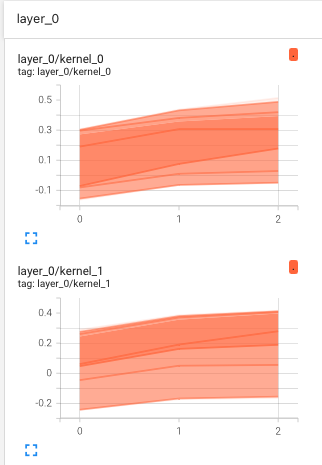

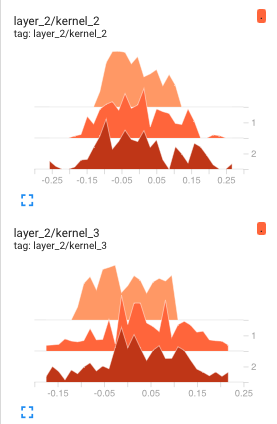

In [ ]:
# 1. Convolution Weight
def weight_histograms_conv2d(writer, step, weights, layer_number):
  weights_shape = weights.shape
  num_kernels = weights_shape[0]
  for k in range(num_kernels):
    flattened_weights = weights[k].flatten()
    tag = f"layer_{layer_number}/kernel_{k}"
    writer.add_histogram(tag, flattened_weights, global_step=step, bins='tensorflow')

# 2. Linear Weight
def weight_histograms_linear(writer, step, weights, layer_number):
  flattened_weights = weights.flatten()
  tag = f"layer_{layer_number}"
  writer.add_histogram(tag, flattened_weights, global_step=step, bins='tensorflow')

# 3. Model Weight
def weight_histograms(writer, step, model):
  print("Visualizing model weights...")
  # Iterate over all model layers
  for layer_number in range(len(model.layers)):
    # Get layer
    layer = model.layers[layer_number]
    # Compute weight histograms for appropriate layer
    if isinstance(layer, nn.Conv2d):
      weights = layer.weight
      weight_histograms_conv2d(writer, step, weights, layer_number)
    elif isinstance(layer, nn.Linear):
      weights = layer.weight
      weight_histograms_linear(writer, step, weights, layer_number)

In [ ]:
# Initialize the SummaryWriter for TensorBoard
# Its output will be written to './runs/' (Default Setting)
writer = SummaryWriter()

# 4. Visualize weight histograms
weight_histograms(writer, epoch, convnet)

# Close the SummaryWriter
writer.close()

In [ ]:
# Log Directory Setting
log_dir = "logs/histogram"

In [ ]:
if __name__ == '__main__':

  # Initialize the SummaryWriter for TensorBoard
  # Its output will be written to log_dir = './logs/histogram'
  writer = SummaryWriter(log_dir=log_dir)

  # Set fixed random number seed
  torch.manual_seed(42)

  # Prepare CIFAR-10 dataset
  dataset = MNIST(os.getcwd(), download=True, transform=transforms.ToTensor())
  trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)

  # Initialize the ConvNet
  convnet = ConvNet()

  # Define the loss function and optimizer
  loss_function = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(convnet.parameters(), lr=1e-4)

  for epoch in range(0, 3): # 5 epochs at maximum

    # 4. Visualize weight histograms
    weight_histograms(writer, epoch, convnet)

    # Print epoch
    print(f'Starting epoch {epoch+1}')

    # Set current loss value
    current_loss = 0.0

    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):

      # Get inputs
      inputs, targets = data

      # Zero the gradients
      optimizer.zero_grad()

      # Perform forward pass
      outputs = convnet(inputs)

      # Compute loss
      loss = loss_function(outputs, targets)

      # Perform backward pass
      loss.backward()

      # Perform optimization
      optimizer.step()

      # Print statistics
      current_loss += loss.item()

      if i % 500 == 499:
          print('Loss after mini-batch %5d: %.3f' %
                (i + 1, current_loss / 500))
          current_loss = 0.0

  # Process is complete.
  print('Training process has finished.')

  # Close the SummaryWriter
  writer.close()

In [ ]:
%tensorboard --logdir logs/histogram --port 6009

### Full model code

In [ ]:
# Log Directory Setting
log_dir = "logs/full"

In [ ]:
if __name__ == '__main__':

  # Initialize the SummaryWriter for TensorBoard
  # Its output will be written to log_dir = './logs/full/'
  writer = SummaryWriter(log_dir=log_dir)

  # Set fixed random number seed
  torch.manual_seed(42)

  # Prepare CIFAR-10 dataset
  dataset = MNIST(os.getcwd(), download=True, transform=transforms.ToTensor())
  trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)

  # Initialize the ConvNet
  convnet = ConvNet()

  # Define the loss function and optimizer
  loss_function = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(convnet.parameters(), lr=1e-4)

  # Run the training loop
  loss_idx_value = 0
  for epoch in range(0, 30): # 5 epochs at maximum

    # Visualize weight histograms
    weight_histograms(writer, epoch, convnet)

    # Print epoch
    print(f'Starting epoch {epoch+1}')

    # Set current loss value
    current_loss = 0.0

    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):

      if i > 1000:
        break

      # Get inputs
      inputs, targets = data

      # Write the network graph at epoch 0, batch 0
      if epoch == 0 and i == 0:
        writer.add_graph(convnet, input_to_model=data[0], verbose=True)

      # Write an image at every batch 0
      if i == 0:
        writer.add_image("Example input", inputs[0], global_step=epoch)

      # Zero the gradients
      optimizer.zero_grad()

      # Perform forward pass
      outputs = convnet(inputs)

      # Compute loss
      loss = loss_function(outputs, targets)

      # Perform backward pass
      loss.backward()

      # Perform optimization
      optimizer.step()

      # Print statistics
      current_loss += loss.item()
      writer.add_scalar("Loss/Minibatches", current_loss, loss_idx_value)
      loss_idx_value += 1
      if i % 500 == 499:
          print('Loss after mini-batch %5d: %.3f' %
                (i + 1, current_loss / 500))
          # Write loss for epoch
          writer.add_scalar("Loss/Epochs", current_loss, epoch)
          current_loss = 0.0

  # Process is complete.
  print('Training process has finished.')

  # Close the SummaryWriter
  writer.close()

In [ ]:
%tensorboard --logdir logs/full --port 6017

## Practice

- Due Date - 2023.10.22
- Please fill in the marked parts and **submit the results of the practice on Scalar, Graph, Image, and Histogram, including the code as a PDF file**.
- Fill in a total of **7 blanks (7 Points)**

In [ ]:
# Package Install
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.tensorboard import SummaryWriter

In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/
!mkdir ./logs/

log_folder = './logs'

# Load the TensorBoard notebook extension
%load_ext tensorboard

# Log Directory Setting
log_dir = log_folder + "/practice"

In [ ]:
# Define a simple ConvNet architecture
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(64 * 6 * 6, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
# 1. Convolution Weight
def weight_histograms_conv2d(writer, step, weights, layer_number):
  weights_shape = weights.shape
  num_kernels = weights_shape[0]
  for k in range(num_kernels):
    flattened_weights = weights[k].flatten()
    tag = f"layer_{layer_number}/kernel_{k}"
    writer.add_histogram(tag, flattened_weights, global_step=step, bins='tensorflow')

# 2. Linear Weight
def weight_histograms_linear(writer, step, weights, layer_number):
  flattened_weights = weights.flatten()
  tag = f"layer_{layer_number}"
  writer.add_histogram(tag, flattened_weights, global_step=step, bins='tensorflow')

# 3. Model Weight
def weight_histograms(writer, step, model):
  print("Visualizing model weights...")
  # Iterate over all model layers
  for layer_number in range(len(model.layers)):
    # Get layer
    layer = model.layers[layer_number]
    # Compute weight histograms for appropriate layer
    if isinstance(layer, nn.Conv2d):
      weights = layer.weight
      weight_histograms_conv2d(writer, step, weights, layer_number)
    elif isinstance(layer, nn.Linear):
      weights = layer.weight
      weight_histograms_linear(writer, step, weights, layer_number)

In [ ]:
if __name__ == '__main__':

  #################################################
  # Fill this part
  # 1. Initialize the SummaryWriter for TensorBoard
  # log_dir = './logs/practice/'
  writer = SummaryWriter(log_dir=log_dir)
  #################################################

  # Set fixed random number seed
  torch.manual_seed(42)

  # Prepare CIFAR-10 dataset
  transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
  dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
  trainloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

  # Initialize the ConvNet
  convnet = ConvNet()

  # Define the loss function and optimizer
  loss_function = nn.CrossEntropyLoss()
  optimizer = optim.Adam(convnet.parameters(), lr=1e-4)

  # Run the training loop
  loss_idx_value = 0
  for epoch in range(0, 10):

    #################################################
    # Fill this part
    # 2. Visualize weight histograms
    weight_histograms(writer, epoch, convnet)
    #################################################

    # Print epoch
    print(f'Starting epoch {epoch+1}')

    # Set current loss value
    current_loss = 0.0

    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):

      # Get inputs
      inputs, targets = data

      if epoch == 0 and i == 0:
        #################################################
        # Fill this part
        # 3. Write the network graph
        writer.add_graph(convnet, input_to_model=data[0], verbose=True)
        #################################################

      if i == 0:
        #################################################
        # Fill this part
        # 4. Write the image
        writer.add_image("Example input", inputs[0], global_step=epoch)
        #################################################

      # Zero the gradients
      optimizer.zero_grad()

      # Perform forward pass
      outputs = convnet(inputs)

      # Compute loss
      loss = loss_function(outputs, targets)

      # Perform backward pass
      loss.backward()

      # Perform optimization
      optimizer.step()

      # Print statistics
      current_loss += loss.item()

      #################################################
      # Fill this part
      # 5. Write the Scalar value (Minibatches)
      writer.add_scalar("Loss/Minibatches", current_loss, loss_idx_value)
      #################################################

      loss_idx_value += 1

      if i % 500 == 499:
          print('Loss after mini-batch %5d: %.3f' %
                (i + 1, current_loss / 500))
          #################################################
          # Fill this part
          # 6. Write the Scalar value (Epoch)
          writer.add_scalar("Loss/Epochs", current_loss, epoch)
          #################################################

          current_loss = 0.0

  # Process is complete.
  print('Training process has finished.')

  #################################################
  # Fill this part
  # 7. Close the SummaryWriter
  writer.close()
  #################################################

In [ ]:
%tensorboard --logdir logs/practice --port 6012

# 1. Scalar
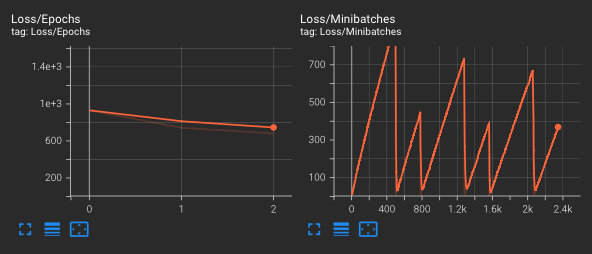

# 2. Image
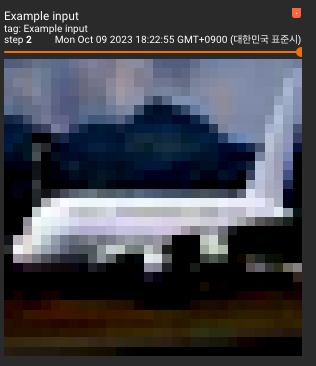

# 3. Graph
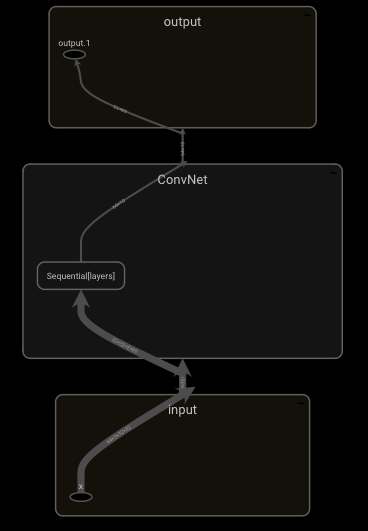

# 4-1. Histogram (Distribution)
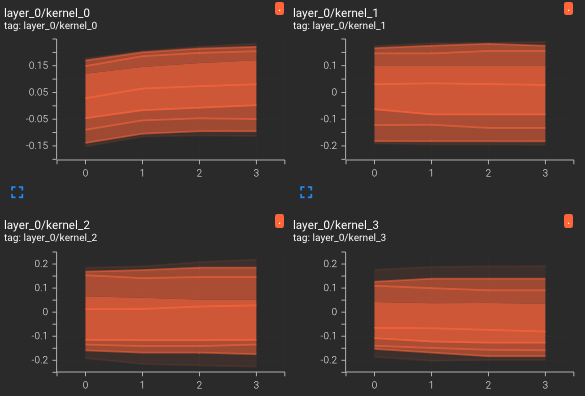

# 4-2. Histogram (Weight)
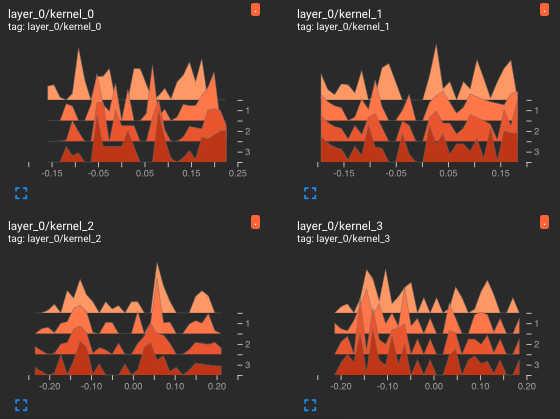